<h1 style='text-align: center'>Popularity of Video Games</h1>

#### **Objective:** Determine if there is a correlation between the genre and themes of a video game, and how  highly it's rated.

**Data Source:** The data I'm using in this project is the International Games Database (IGDB). The data is fetched from their API, unless already saved in the user's local directory. 


In [57]:
import pandas as pd

import requests
from requests import post
import os
import time
import sqlite3

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import functions as f

First, I create a function to check for if the csv file is stored on the local machine. If it is, it reads the csv in as the dataframe. If not, it fetches the API and data as provided, and saves it as the csv file.

Next, is the information needed to create the dataframes. The main one I will be using in this project is the games dataframe. I also pull in the APIs for genres, keywords, and themes. These all have corresponding columns in the games dataframe, that will be used to merge the dataframes together.

In [11]:
# IGDB games main dataset
csv_file_path = "data/games_data.csv"
api_endpoint = "https://api.igdb.com/v4/games"
data = 'fields age_ratings,aggregated_rating,aggregated_rating_count,alternative_names,artworks,bundles,category,checksum,collection,collections,cover,created_at,dlcs,expanded_games,expansions,external_games,first_release_date,follows,forks,franchise,franchises,game_engines,game_localizations,game_modes,genres,hypes,involved_companies,keywords,language_supports,multiplayer_modes,name,parent_game,platforms,player_perspectives,ports,rating,rating_count,release_dates,remakes,remasters,screenshots,similar_games,slug,standalone_expansions,status,storyline,summary,tags,themes,total_rating,total_rating_count,updated_at,url,version_parent,version_title,videos,websites;'
games = f.load_or_fetch_data(csv_file_path, api_endpoint, data)

# IGDB Genre API
csv_file_path = 'data/igdb_genre.csv'
api_endpoint = 'https://api.igdb.com/v4/genres'
data = 'fields checksum,name;'
genres = f.load_or_fetch_data(csv_file_path, api_endpoint, data)

# IGDB Keywords API
csv_file_path = 'data/igdb_keywords.csv'
api_endpoint = 'https://api.igdb.com/v4/keywords'
data = 'fields checksum,name;'
keywords = f.load_or_fetch_data(csv_file_path, api_endpoint, data)

# IGDB Themes API
csv_file_path = 'data/igdb_themes.csv'
api_endpoint = 'https://api.igdb.com/v4/themes'
data = 'fields checksum,name;'
themes = f.load_or_fetch_data(csv_file_path, api_endpoint, data)

CSV file 'data/games_data.csv' found. Loading data from CSV.


c:\Users\camil\OneDrive\Documents\Projects\Game_Ratings_EDA\functions.py:23: DtypeWarning: Columns (54) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(csv_file_path)


CSV file 'data/igdb_genre.csv' found. Loading data from CSV.
CSV file 'data/igdb_keywords.csv' found. Loading data from CSV.
CSV file 'data/igdb_themes.csv' found. Loading data from CSV.


With the data all read in, it's time to check the data and start working towards data cleaning.

In [12]:
games.head(3)

,id,artworks,category,cover,created_at,external_games,first_release_date,genres,name,platforms,...,ports,aggregated_rating,aggregated_rating_count,expanded_games,franchise,remasters,remakes,expansions,forks,standalone_expansions
0,149166,[19910],0,184323.0,1621976460,"[2057496, 2695570, 2053889]",1.642982e+09,"[10, 14, 15, 31, 32]",Racing Outlaws,"[3, 6, 14]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,157761,NaN,1,380797.0,1626338753,[2056165],1.525133e+09,[13],Microsoft Flight Simulator X: Steam Edition - ...,[6],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335661,NaN,0,444936.0,1742049962,[2993188],1.374019e+09,"[32, 33]",Everlasting Tower,"[3, 6, 14]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Initial check of size and data types of dataframe
df_shape = games.shape
print(f'The DataFrame has {df_shape[0]:,} rows and {df_shape[1]} columns! \n')
print(games.info())

The DataFrame has 308,142 rows and 56 columns! 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308142 entries, 0 to 308141
Data columns (total 56 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       308142 non-null  int64  
 1   artworks                 127841 non-null  object 
 2   category                 308142 non-null  int64  
 3   cover                    242794 non-null  float64
 4   created_at               308142 non-null  int64  
 5   external_games           283988 non-null  object 
 6   first_release_date       218212 non-null  float64
 7   genres                   254488 non-null  object 
 8   name                     308141 non-null  object 
 9   platforms                234599 non-null  object 
 10  release_dates            233252 non-null  object 
 11  screenshots              229665 non-null  object 
 12  similar_games            252938 non-null  object 
 13  slug      

## Data Cleaning 

#### Dropping Columns

Starting with the games dataframe, it has 55 columns to start, a majority of which will not be necessary for this project. After clearing the games columns down, I drop the other dataframes down to just their ids and names.

In [14]:
# Clean column names
games.columns = games.columns.str.strip().str.title().str.replace('_', ' ')
games.columns

Index(['Id', 'Artworks', 'Category', 'Cover', 'Created At', 'External Games',
       'First Release Date', 'Genres', 'Name', 'Platforms', 'Release Dates',
       'Screenshots', 'Similar Games', 'Slug', 'Summary', 'Tags', 'Themes',
       'Updated At', 'Url', 'Websites', 'Checksum', 'Language Supports',
       'Game Modes', 'Involved Companies', 'Parent Game',
       'Player Perspectives', 'Game Engines', 'Keywords', 'Videos',
       'Age Ratings', 'Alternative Names', 'Franchises', 'Game Localizations',
       'Collections', 'Dlcs', 'Storyline', 'Bundles', 'Hypes',
       'Multiplayer Modes', 'Rating', 'Rating Count', 'Total Rating',
       'Total Rating Count', 'Version Parent', 'Version Title', 'Status',
       'Ports', 'Aggregated Rating', 'Aggregated Rating Count',
       'Expanded Games', 'Franchise', 'Remasters', 'Remakes', 'Expansions',
       'Forks', 'Standalone Expansions'],
      dtype='object')

In [15]:
games = games.drop(columns=['Id', 'Category', 'Franchises', 'Platforms', 'Rating', 'Rating Count', 'Aggregated Rating', 'Aggregated Rating Count', 'Summary', 'Storyline', 'Tags', 'Involved Companies', 'Checksum', 'Age Ratings', 'Alternative Names', 'Cover', 'Created At', 'External Games', 'Player Perspectives', 'Release Dates', 'Screenshots', 'Similar Games', 'Updated At', 'Url', 'Videos', 'Websites', 'Ports', 'Language Supports', 'Collections', 'Hypes', 'Version Parent', 'Version Title', 'Bundles', 'Dlcs', 'Expanded Games', 'Expansions', 'Remakes', 'Remasters', 'Standalone Expansions', 'Forks', 'Slug', 'Artworks', 'Multiplayer Modes', 'Status', 'Franchise', 'Parent Game', 'Game Localizations', 'Game Modes', 'Game Engines'])

In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308142 entries, 0 to 308141
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   First Release Date  218212 non-null  float64
 1   Genres              254488 non-null  object 
 2   Name                308141 non-null  object 
 3   Themes              172176 non-null  object 
 4   Keywords            107276 non-null  object 
 5   Total Rating        37253 non-null   float64
 6   Total Rating Count  37253 non-null   float64
dtypes: float64(3), object(4)
memory usage: 16.5+ MB


In [17]:
themes = themes.drop('checksum', axis=1)
keywords = keywords.drop('checksum', axis=1)
genres = genres.drop('checksum', axis=1)

#### Null Values
Next, I will work on filling or dropping null values in the games dataframe. The name value has only one null value, so I drop it. As well, I'm most curious about games with defined genres, so any null values in that column are also dropped. The columns for Total Rating and Total Rating Count as well as Keywords and Themes have their null values filled.

In [18]:
# Drop or fill null values 
games = games.dropna(subset=['Name', 'Genres'])
games[['Keywords', 'Themes']] = games[['Keywords', 'Themes']].fillna('Unknown')
games[['Total Rating', 'Total Rating Count']] = games[['Total Rating', 'Total Rating Count']].fillna(0)

Before moving on, I also want to reorder the columns and reset the index, for better flow while looking at the data.

In [19]:
games = games[['Name', 'First Release Date', 'Genres', 'Themes', 'Keywords', 'Total Rating Count', 'Total Rating']]
games.reset_index(drop=True, inplace=True)
games.head()

,Name,First Release Date,Genres,Themes,Keywords,Total Rating Count,Total Rating
0,Racing Outlaws,1.642982e+09,"[10, 14, 15, 31, 32]",[1],Unknown,0.0,0.0
1,Microsoft Flight Simulator X: Steam Edition - ...,1.525133e+09,[13],Unknown,Unknown,0.0,0.0
2,Everlasting Tower,1.374019e+09,"[32, 33]",[1],"[1705, 1780, 42847]",0.0,0.0
3,Hazard School: Bully Fight,1.704586e+09,"[12, 31, 32]",[1],Unknown,0.0,0.0
4,Nightmare Kart: The Old Karts,NaN,"[10, 33]",[1],Unknown,0.0,0.0


## Value and DataType Adjustments
The column for First Release Date currently isn't very user friendly, so I convert it to datetime for readability.

In [20]:
# Convert the 'First Release Date' column from Unix timestamps to datetime
games['First Release Date'] = pd.to_datetime(games['First Release Date'], unit='s')


In [21]:
games['Total Rating Count'] = games['Total Rating Count'].astype(int)

games['Total Rating'] = games['Total Rating'].round(2)

In [22]:
# Define a universal function to map IDs to names
def map_ids_to_names(df, col_name, id_to_name_dict):
    """
    Map reference IDs in a specified column to their corresponding names.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the column to be mapped.
        col_name (str): The name of the column containing reference IDs.
        id_to_name_dict (dict): Dictionary mapping IDs to names.

    Returns:
        pd.DataFrame: The DataFrame with the specified column mapped to names.
    """
    def map_ids(ids):
        if isinstance(ids, list) and all(isinstance(x, str) for x in ids):
            return ids
        if isinstance(ids, str):
            try:
                ids = eval(ids)
            except (SyntaxError, TypeError, NameError):
                return 'Unknown'
        if isinstance(ids, list):
            names = [id_to_name_dict.get(id_, 'Unknown') for id_ in ids]
            return names
        return 'Unknown'

    df[col_name] = df[col_name].apply(map_ids)
    return df


In [23]:
key_dict = keywords.set_index('id')['name'].to_dict()
games = map_ids_to_names(games, 'Keywords', key_dict)

theme_dict = themes.set_index('id')['name'].to_dict()
games = map_ids_to_names(games, 'Themes', theme_dict)

genre_dict = genres.set_index('id')['name'].to_dict()
games = map_ids_to_names(games, 'Genres', genre_dict)

In [24]:
games.tail()

,Name,First Release Date,Genres,Themes,Keywords,Total Rating Count,Total Rating
254482,Anomaly Defenders,2014-05-29,"[Strategy, Indie]","[Action, Science fiction]","[tower defense, steam, steam achievements, dig...",7,51.82
254483,Catacombs Pack,2013-03-14,[Shooter],[Fantasy],Unknown,0,0.00
254484,"Time Gentlemen, Please!",2009-06-22,"[Point-and-click, Puzzle, Adventure, Indie]",[Comedy],"[aliens, dinosaurs, time travel, interactive f...",9,81.79
254485,The Black Mirror,2003-10-17,"[Point-and-click, Adventure]","[Horror, Mystery]","[1980s, steam, murder mystery, original soundt...",67,80.71
254486,DayZ,2018-12-13,"[Shooter, Role-playing (RPG), Simulator, Tacti...","[Action, Horror, Thriller, Survival, Drama, Sa...","[zombies, post-apocalyptic, permadeath, online...",139,59.44


In [25]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254487 entries, 0 to 254486
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Name                254487 non-null  object        
 1   First Release Date  196486 non-null  datetime64[ns]
 2   Genres              254487 non-null  object        
 3   Themes              254487 non-null  object        
 4   Keywords            254487 non-null  object        
 5   Total Rating Count  254487 non-null  int64         
 6   Total Rating        254487 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 13.6+ MB


## Feature Engineering

Here I want to extract the year from the First Release Date column. I create a new column for the Year Released, fill the null values and convert it to an int datatype. 

In [26]:
games['Year Released'] = games['First Release Date'].dt.year
games['Year Released'] = games['Year Released'].fillna(0)
games['Year Released'] = games['Year Released'].astype(int)
games.head()

,Name,First Release Date,Genres,Themes,Keywords,Total Rating Count,Total Rating,Year Released
0,Racing Outlaws,2022-01-24,"[Racing, Sport, Strategy, Adventure, Indie]",[Action],Unknown,0,0.0,2022
1,Microsoft Flight Simulator X: Steam Edition - ...,2018-05-01,[Simulator],Unknown,Unknown,0,0.0,2018
2,Everlasting Tower,2013-07-17,"[Indie, Arcade]",[Action],"[pixel art, pixel graphics, endless]",0,0.0,2013
3,Hazard School: Bully Fight,2024-01-07,"[Role-playing (RPG), Adventure, Indie]",[Action],Unknown,0,0.0,2024
4,Nightmare Kart: The Old Karts,NaT,"[Racing, Arcade]",[Action],Unknown,0,0.0,0


In [56]:
flat_genres = games.explode('Genres')
flat_genres.to_csv('data/flat_genres.csv', index=False)

genre_counts = flat_genres['Genres'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
genre_counts = genre_counts.sort_values(by='Count', ascending=False)

# Get Keyword counts (will chart top 50? keywords excluding unknowns.)
flat_keywords = games.explode('Keywords')
flat_keywords.to_csv('data/flat_keywords.csv', index=False)

keywords_counts = flat_keywords['Keywords'].value_counts().reset_index()
keywords_counts.columns = ['Keyword', 'Count']

# Get Theme counts
flat_themes = games.explode('Themes')
flat_themes.to_csv('data/flat_themes.csv', index=False)

themes_counts = flat_themes['Themes'].value_counts().reset_index()
themes_counts.columns = ['Theme', 'Count']
themes_counts = themes_counts[themes_counts['Theme'] != 'Unknown']

In [ ]:
flat = games.explode('Genres').explode('Keywords').explode('Themes')

## Exploratory Data Analysis

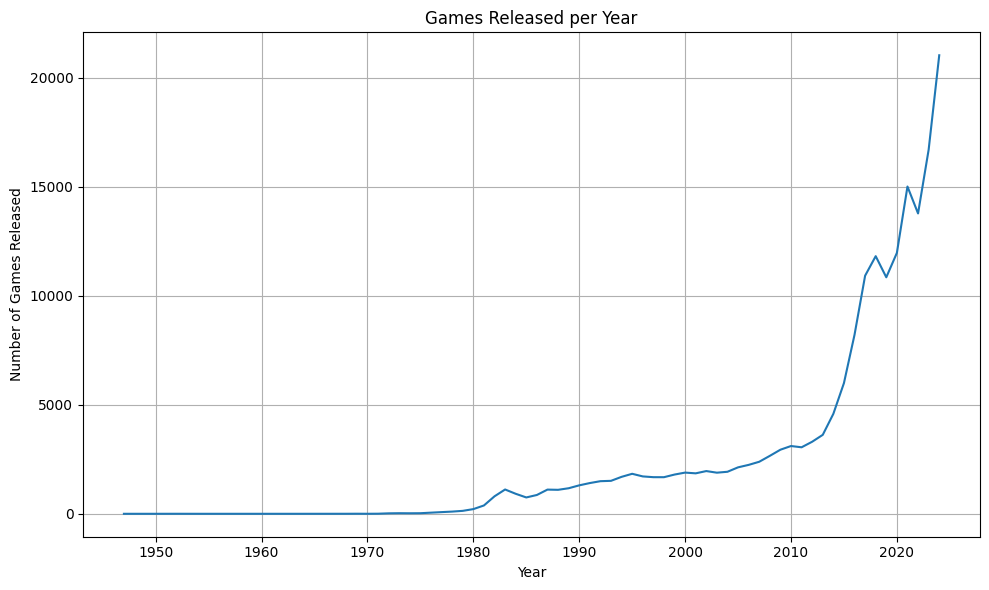

In [46]:
# Line graph of game release dates
games_years = games[games['Year Released'] != 0]
games_years = games_years[games_years['Year Released'] <= 2024]
games_per_year = games_years.groupby('Year Released').size()

# Plot the sightings per year on line graph
games_per_year.plot(
    kind='line',
    figsize=(10, 6),
    x=games_per_year.index,
    y=games_per_year.values,
    grid=True
).set(
    title='Games Released per Year',
    xlabel='Year',
    ylabel='Number of Games Released'
)
plt.tight_layout()
plt.show()


In [28]:
min_year = games_years['Year Released'].min()
max_year = games_years['Year Released'].max()
print(f"Min Year: {min_year}, Max Year: {max_year}")

Min Year: 1947, Max Year: 2025


In [29]:
games_ratings = games[games['Total Rating'] != 0]
# Mean, median, mode of ratings
mean_ratings = games_ratings['Total Rating'].mean()
median_ratings = games_ratings['Total Rating'].median()
mode_ratings = games_ratings['Total Rating'].mode()[0]

print(f'The average rating across video games is {mean_ratings:.2f}.')
print(f'The median rating is {median_ratings}.')
print(f'The most frequent rating is {mode_ratings}.')

The average rating across video games is 67.03.
The median rating is 70.0.
The most frequent rating is 70.0.


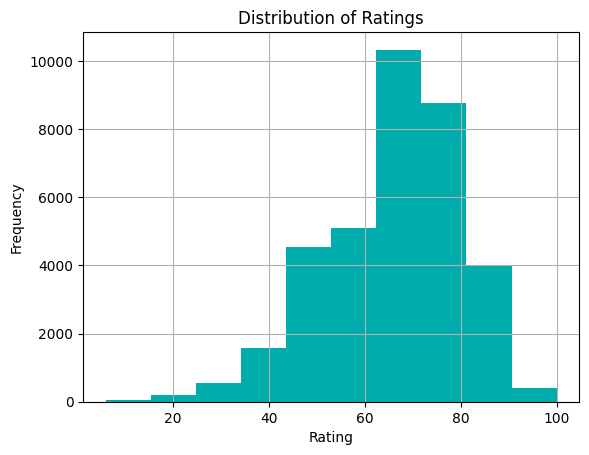

In [30]:
# 
games_ratings['Total Rating'].hist(color='#00adac')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

In [31]:
flat_genres = games.explode('Genres')

genre_counts = flat_genres['Genres'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
genre_counts = genre_counts.sort_values(by='Count', ascending=False)

# Get Keyword counts (will chart top 50? keywords excluding unknowns.)
flat_keywords = games.explode('Keywords')

keywords_counts = flat_keywords['Keywords'].value_counts().reset_index()
keywords_counts.columns = ['Keyword', 'Count']

# Get Theme counts
flat_themes = games.explode('Themes')

themes_counts = flat_themes['Themes'].value_counts().reset_index()
themes_counts.columns = ['Theme', 'Count']
themes_counts = themes_counts[themes_counts['Theme'] != 'Unknown']

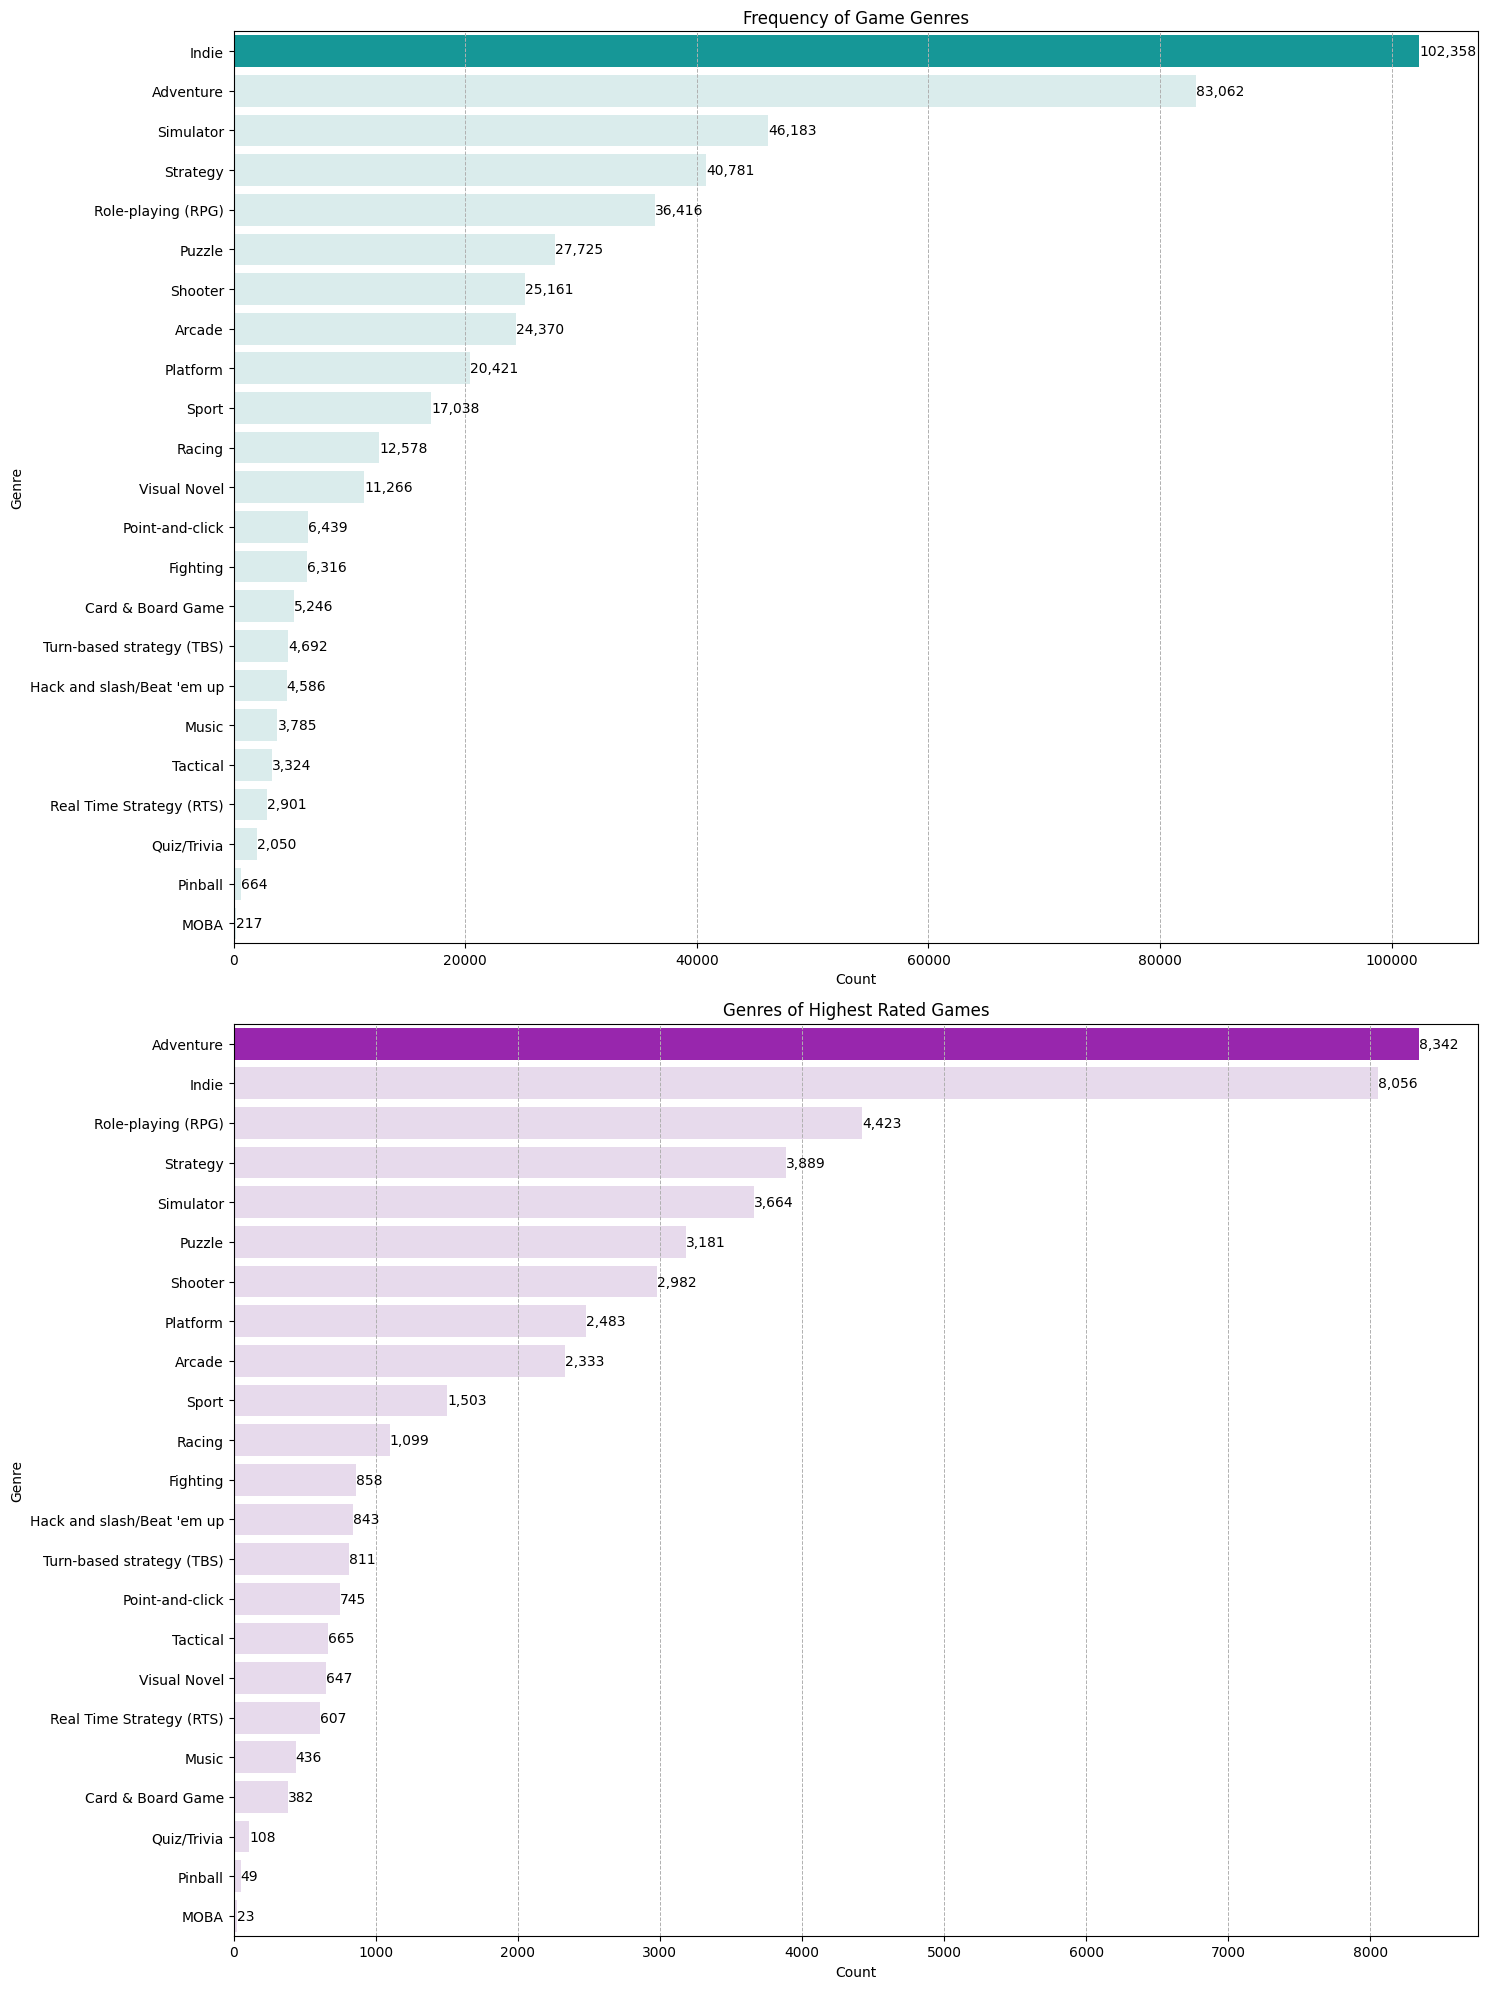

In [32]:
genre_head = genre_counts.sort_values(by='Count', ascending=False)

top_theme = genre_head['Count'].idxmax()

colors_1 = ['#00adac' if i == top_theme else '#d7efef' for i in genre_head.index]

top_rated_games = games_ratings[games_ratings['Total Rating'] >= median_ratings]
flat_top_genres = top_rated_games.explode('Genres')
top_rated_genres = flat_top_genres['Genres'].value_counts().reset_index()
top_rated_genres.columns = ['Genre', 'Count']

top_rated_genre = top_rated_genres['Count'].idxmax()

colors_2 = ['#a80fc4' if i == top_rated_genre else '#e8d7ef' for i in top_rated_genres.index]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))
sns.barplot(x='Count', y='Genre', data=genre_counts, palette=colors_1, hue='Genre', legend=False, ax=ax1)
ax1.set_xlabel('Count')
ax1.set_ylabel('Genre')
ax1.set_title('Frequency of Game Genres')
ax1.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7)

# Annotate each bar
for index, value in enumerate(genre_counts['Count']):
    ax1.text(value, index, f'{value:,}', color='black', ha="left", va="center")



sns.barplot(x='Count', y='Genre', data=top_rated_genres, palette=colors_2, hue='Genre', legend=False, ax=ax2)
ax2.set_xlabel('Count')
ax2.set_ylabel('Genre')
ax2.set_title('Genres of Highest Rated Games')
ax2.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7)

for index, value in enumerate(top_rated_genres['Count']):
    ax2.text(value, index, f'{value:,}', color='black', ha='left', va='center')

plt.tight_layout()
plt.show()

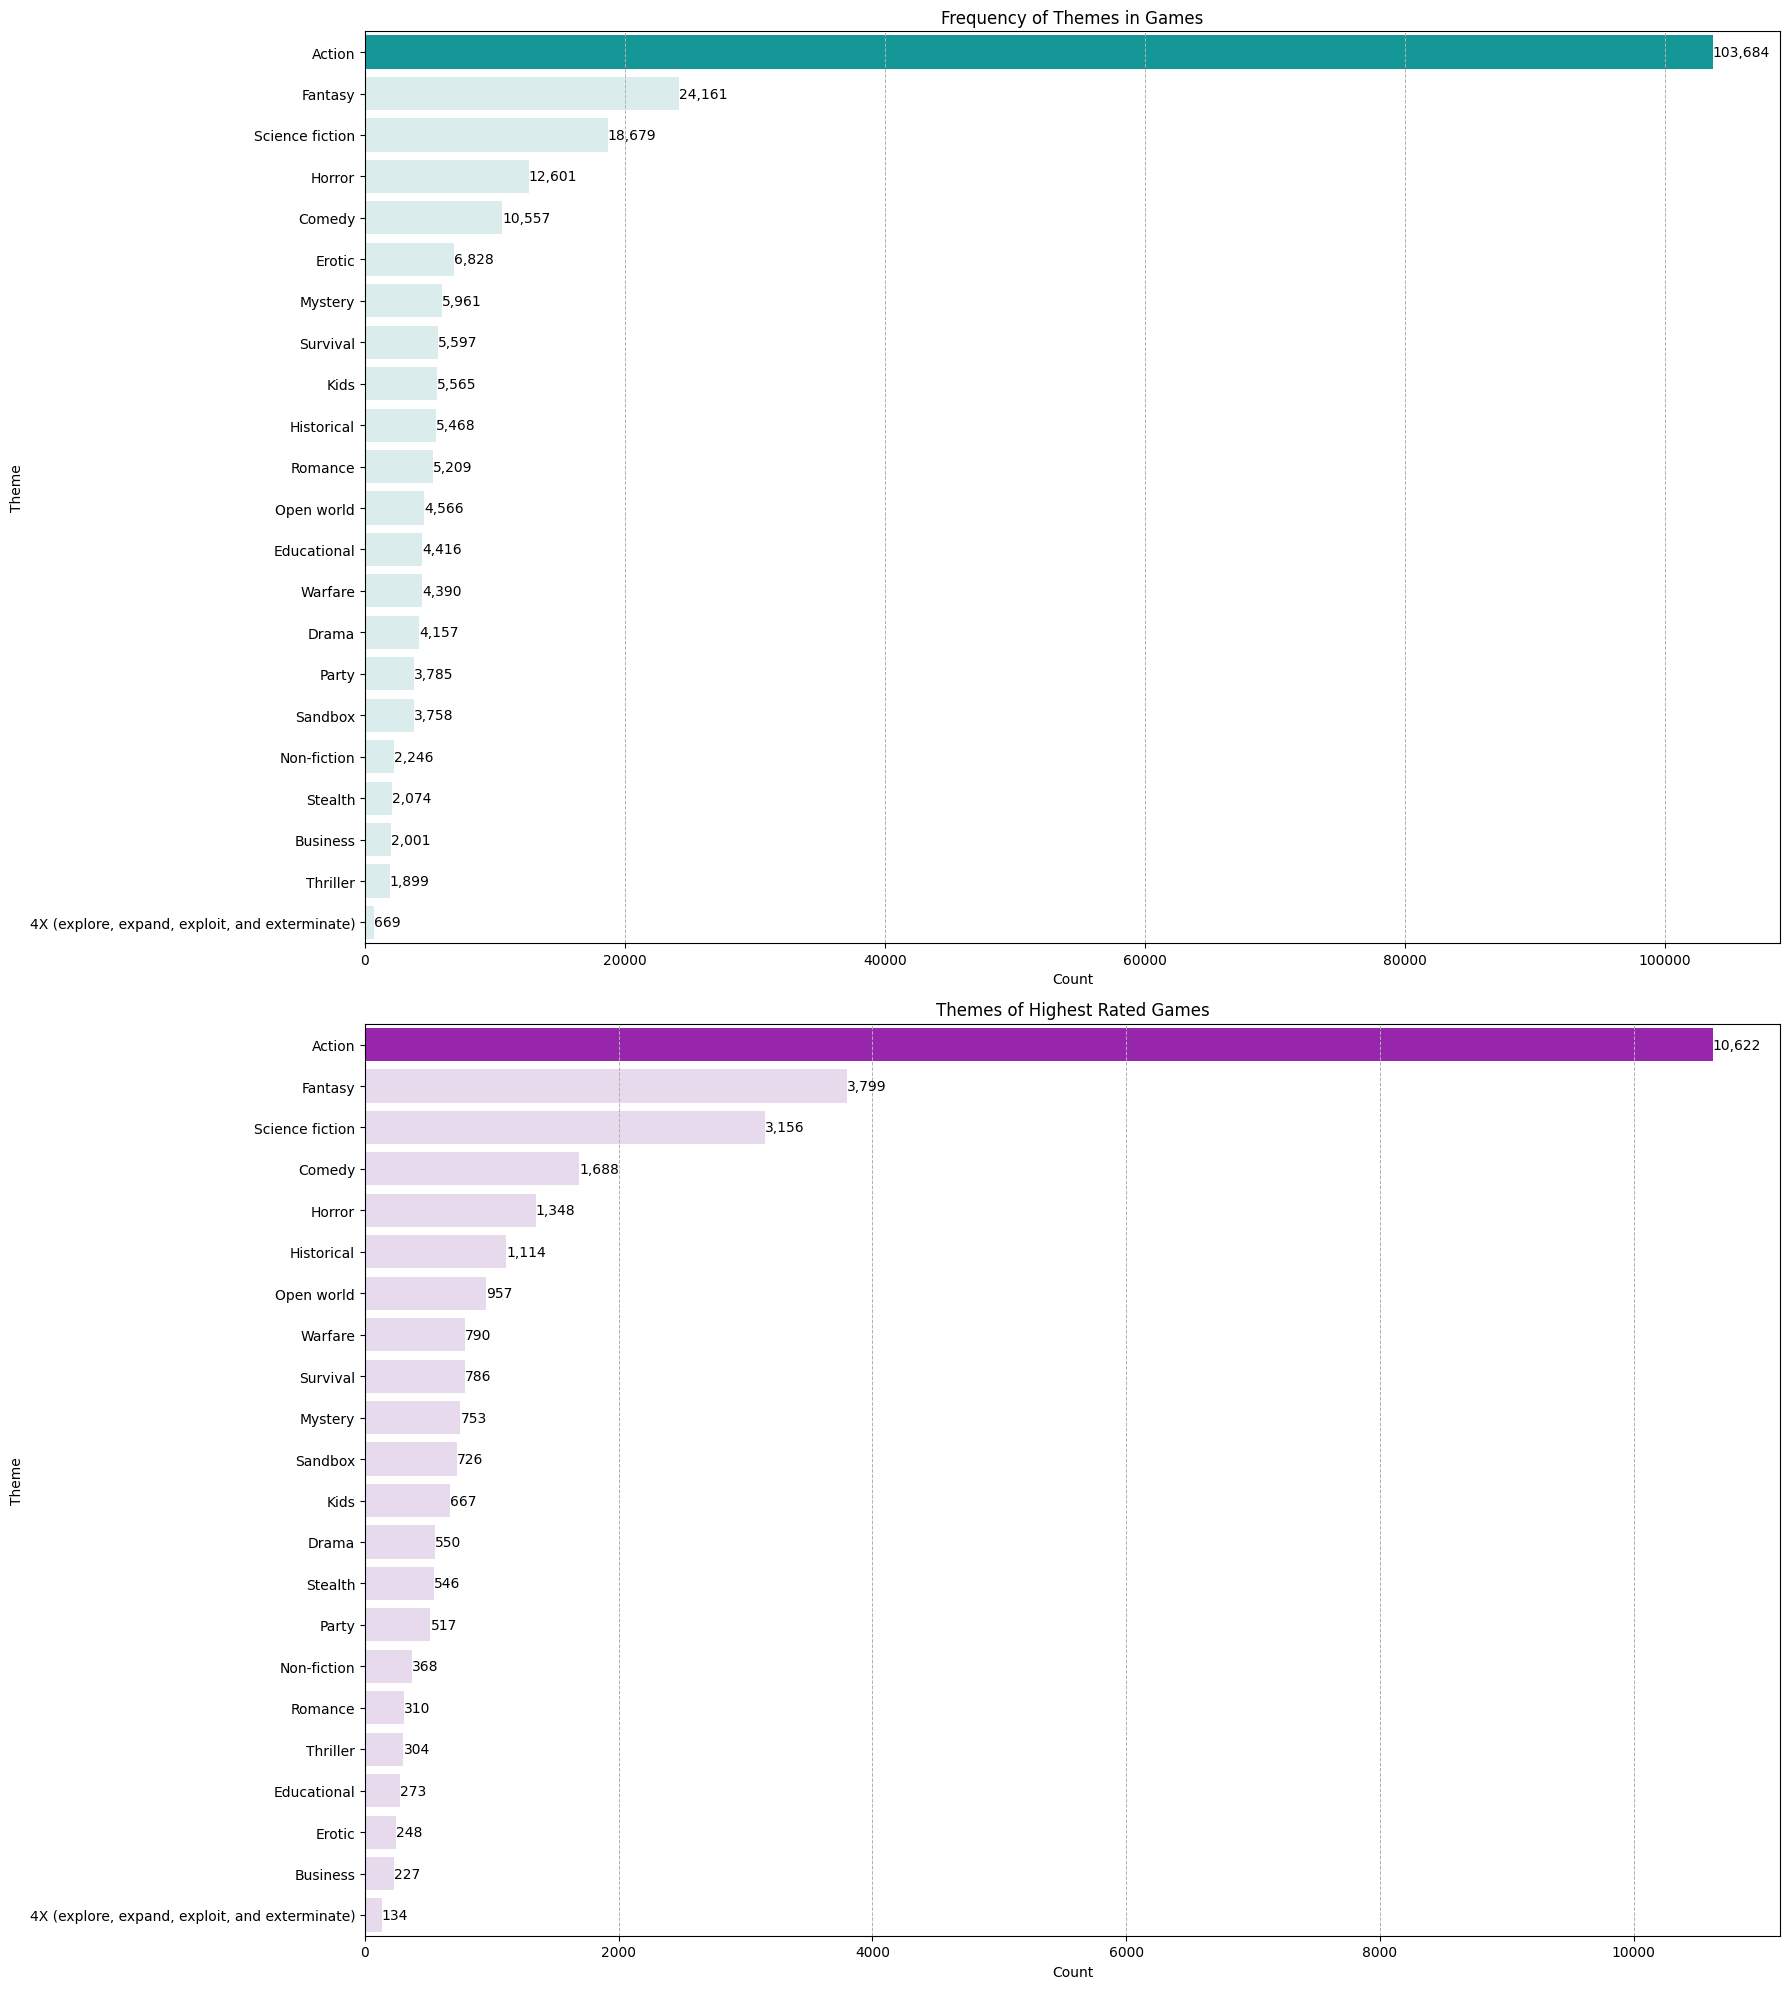

In [33]:
themes_head = themes_counts[themes_counts['Theme'] != 'Unknown']
themes_head = themes_head.sort_values(by='Count', ascending=False)

top_theme = themes_head['Count'].idxmax()

colors_1 = ['#00adac' if i == top_theme else '#d7efef' for i in themes_head.index]

top_rated_games = games_ratings[games_ratings['Total Rating'] >= median_ratings]
flat_top_themes = top_rated_games.explode('Themes')
top_rated_themes = flat_top_themes['Themes'].value_counts().reset_index()
top_rated_themes.columns = ['Theme', 'Count']
top_rated_themes = top_rated_themes[top_rated_themes['Theme'] != 'Unknown']

top_rated_theme = top_rated_themes['Count'].idxmax()

colors_2 = ['#a80fc4' if i == top_rated_theme else '#e8d7ef' for i in top_rated_themes.index]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 20))

sns.barplot(x='Count', y='Theme', data=themes_counts, palette=colors_1, hue='Theme', legend=False, ax=ax1)
ax1.set_xlabel('Count')
ax1.set_ylabel('Theme')
ax1.set_title('Frequency of Themes in Games')
ax1.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7)
# Annotate each bar
for index, value in enumerate(themes_counts['Count']):
    ax1.text(value, index, f'{value:,}', color='black', ha="left", va="center")


sns.barplot(x='Count', y='Theme', data=top_rated_themes, palette=colors_2, hue='Theme', legend=False, ax=ax2)
ax2.set_xlabel('Count')
ax2.set_ylabel('Theme')
ax2.set_title('Themes of Highest Rated Games')
ax2.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7)
for index, value in enumerate(top_rated_themes['Count']):
    ax2.text(value, index, f'{value:,}', color='black', ha='left', va='center')



plt.tight_layout()
plt.show()


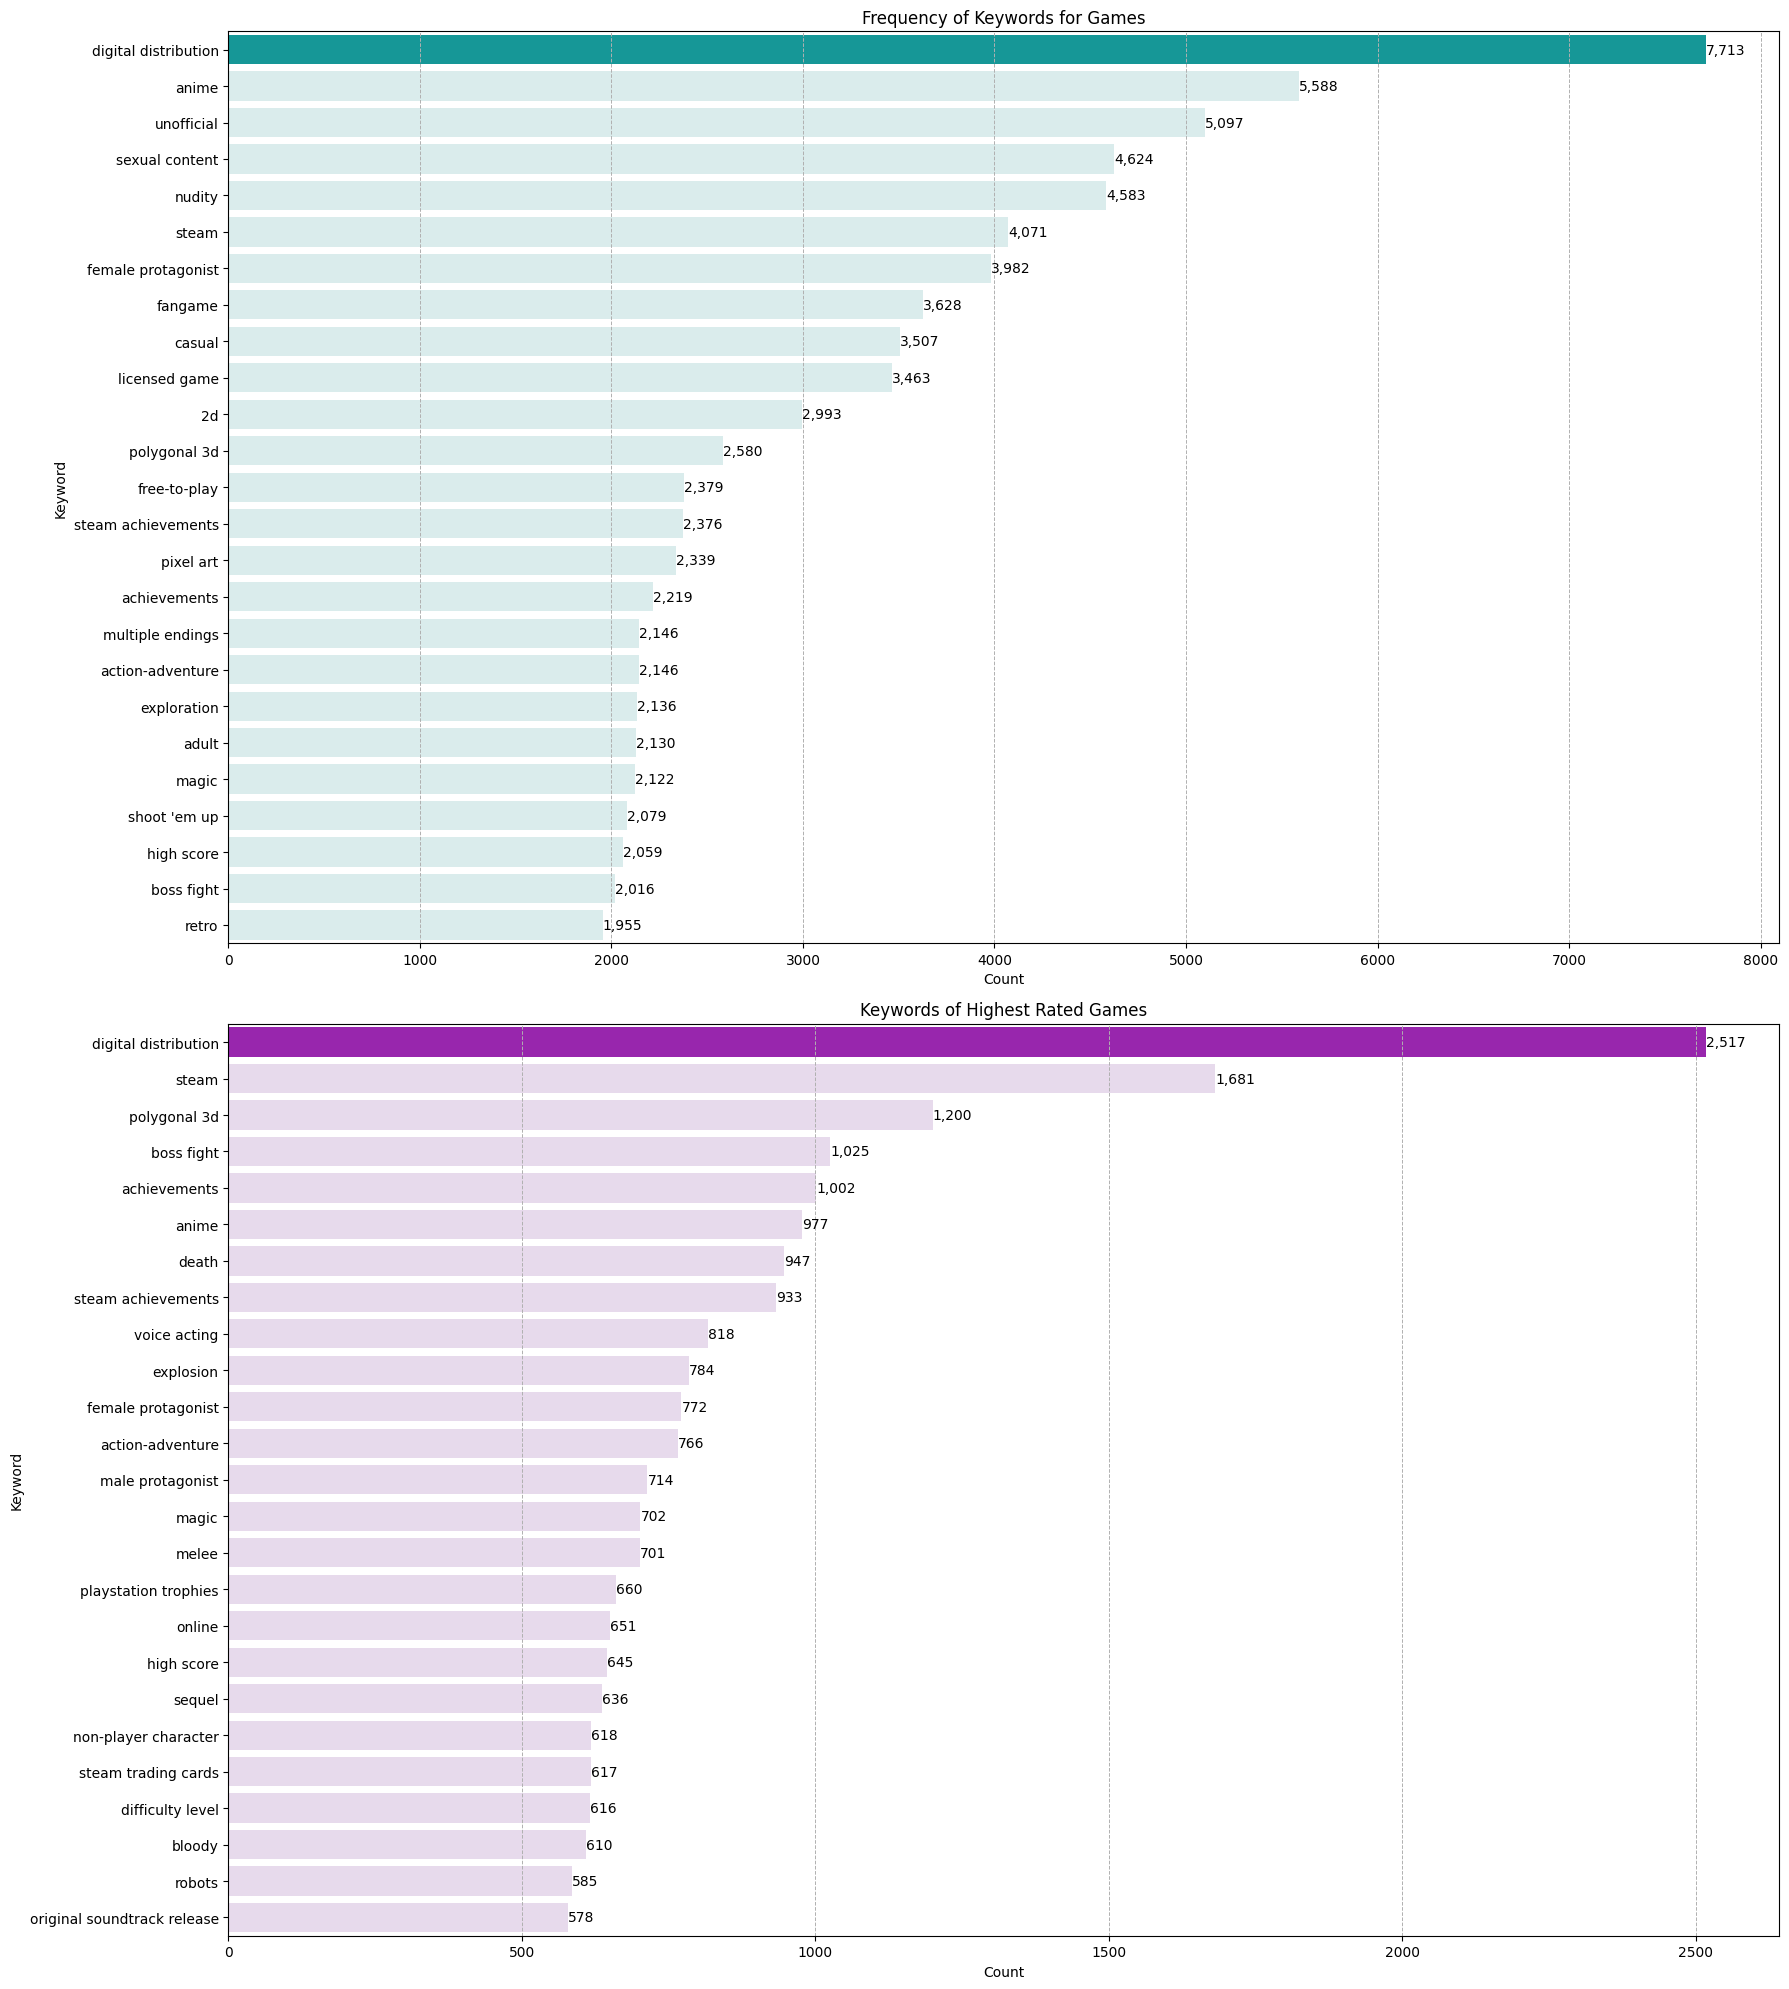

In [34]:
keywords_head = keywords_counts[keywords_counts['Keyword'] != 'Unknown'].head(25)
keywords_head = keywords_head.sort_values(by='Count', ascending=False)

top_keyword = keywords_head['Count'].idxmax()

colors_1 = ['#00adac' if i == top_keyword else '#d7efef' for i in keywords_head.index]

top_rated_games = games_ratings[games_ratings['Total Rating'] >= median_ratings]
flat_top_keywords = top_rated_games.explode('Keywords')
top_rated_keywords = flat_top_keywords['Keywords'].value_counts().reset_index()
top_rated_keywords.columns = ['Keyword', 'Count']
top_rated_keywords = top_rated_keywords[top_rated_keywords['Keyword'] != 'Unknown'].head(25)

top_rated_keyword = top_rated_keywords['Count'].idxmax()

colors_2 = ['#a80fc4' if i == top_rated_keyword else '#e8d7ef' for i in top_rated_keywords.index]
# Create a bar chart
# Create a horizontal bar chart using seaborn
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 20))

sns.barplot(x='Count', y='Keyword', data=keywords_head, palette=colors_1, hue='Keyword', legend=False, ax=ax1)
ax1.set_xlabel('Count')
ax1.set_ylabel('Keyword')
ax1.set_title('Frequency of Keywords for Games')
ax1.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7)
# Annotate each bar
for index, value in enumerate(keywords_head['Count']):
    ax1.text(value, index, f'{value:,}', color='black', ha="left", va="center")


sns.barplot(x='Count', y='Keyword', data=top_rated_keywords, palette=colors_2, hue='Keyword', legend=False, ax=ax2)
ax2.set_xlabel('Count')
ax2.set_ylabel('Keyword')
ax2.set_title('Keywords of Highest Rated Games')
ax2.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7)
for index, value in enumerate(top_rated_keywords['Count']):
    ax2.text(value, index, f'{value:,}', color='black', ha='left', va='center')


plt.tight_layout()
plt.show()

In [35]:
games__rating_count = top_rated_games[top_rated_games['Total Rating Count'] >= 500]
games__rating_count = games__rating_count.sort_values(by='Total Rating Count', ascending=False)
games__rating_count.head(3)

,Name,First Release Date,Genres,Themes,Keywords,Total Rating Count,Total Rating,Year Released
64199,Grand Theft Auto V,2013-09-17,"[Shooter, Racing, Adventure]","[Action, Comedy, Sandbox, Open world]","[aliens, helicopter, assassin, vehicular comba...",4909,88.83,2013
39046,The Witcher 3: Wild Hunt,2015-05-19,"[Role-playing (RPG), Adventure]","[Action, Fantasy, Open world]","[bloody, medieval, dark fantasy, elves, horse,...",4444,92.81,2015
24944,Portal 2,2011-04-18,"[Shooter, Platform, Puzzle, Adventure]","[Action, Science fiction, Comedy]","[robots, elves, female protagonist, steam, fai...",3782,92.00,2011


In [36]:
top_ratings =  games__rating_count.sort_values(by='Total Rating', ascending=False)
top_ratings.head()

,Name,First Release Date,Genres,Themes,Keywords,Total Rating Count,Total Rating,Year Released
65209,The Witcher 3: Wild Hunt - Game of the Year Ed...,2016-08-29,"[Role-playing (RPG), Adventure]","[Action, Fantasy, Historical, Open world]",Unknown,542,98.35,2016
252089,Super Metroid,1994-03-19,"[Shooter, Platform, Adventure]","[Action, Science fiction, Thriller]","[aliens, exploration, 2d, 16-bit, metroidvania...",912,96.45,1994
55715,The Legend of Zelda: A Link to the Past,1991-11-21,"[Puzzle, Adventure]","[Action, Fantasy]","[ghosts, wizards, magic, mascot, prequel, deat...",1476,96.20,1991
254337,Super Mario World,1990-11-21,"[Platform, Adventure]","[Action, Fantasy]","[dinosaurs, princess, yoshi, mario, digital di...",1695,96.13,1990
27303,Elden Ring,2022-02-25,"[Role-playing (RPG), Adventure]","[Action, Fantasy, Open world]","[exploration, monsters, knights, violence, med...",1404,96.09,2022


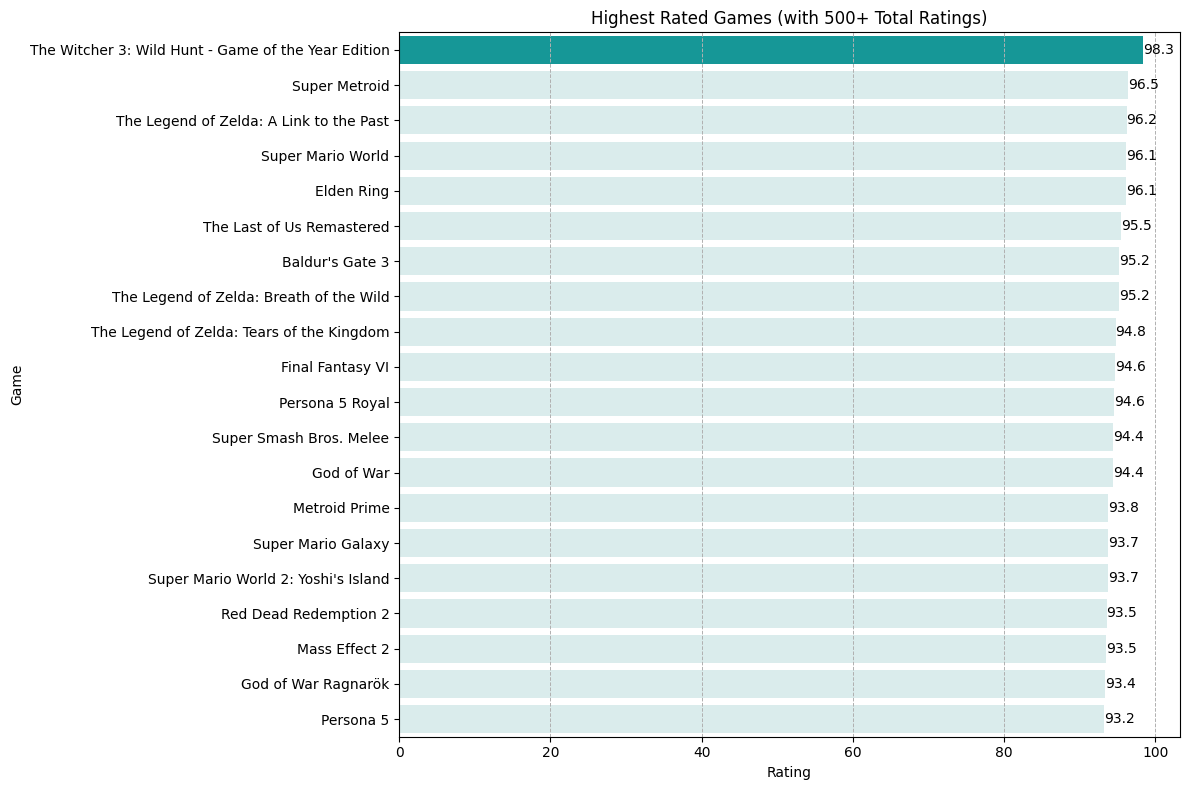

In [37]:
top_ratings = top_ratings.head(20)
top_game = top_ratings['Total Rating'].idxmax()

colors = ['#00adac' if i == top_game else '#d7efef' for i in top_ratings.index]
# Create a bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Rating', y='Name', data=top_ratings, palette=colors, hue='Name', legend=False)

# Annotate each bar with the rating value
for index, value in enumerate(top_ratings['Total Rating']):
    plt.text(value, index, f'{value:.1f}', color='black', ha='left', va='center')

plt.xlabel('Rating')
plt.ylabel('Game')
plt.title('Highest Rated Games (with 500+ Total Ratings)')
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


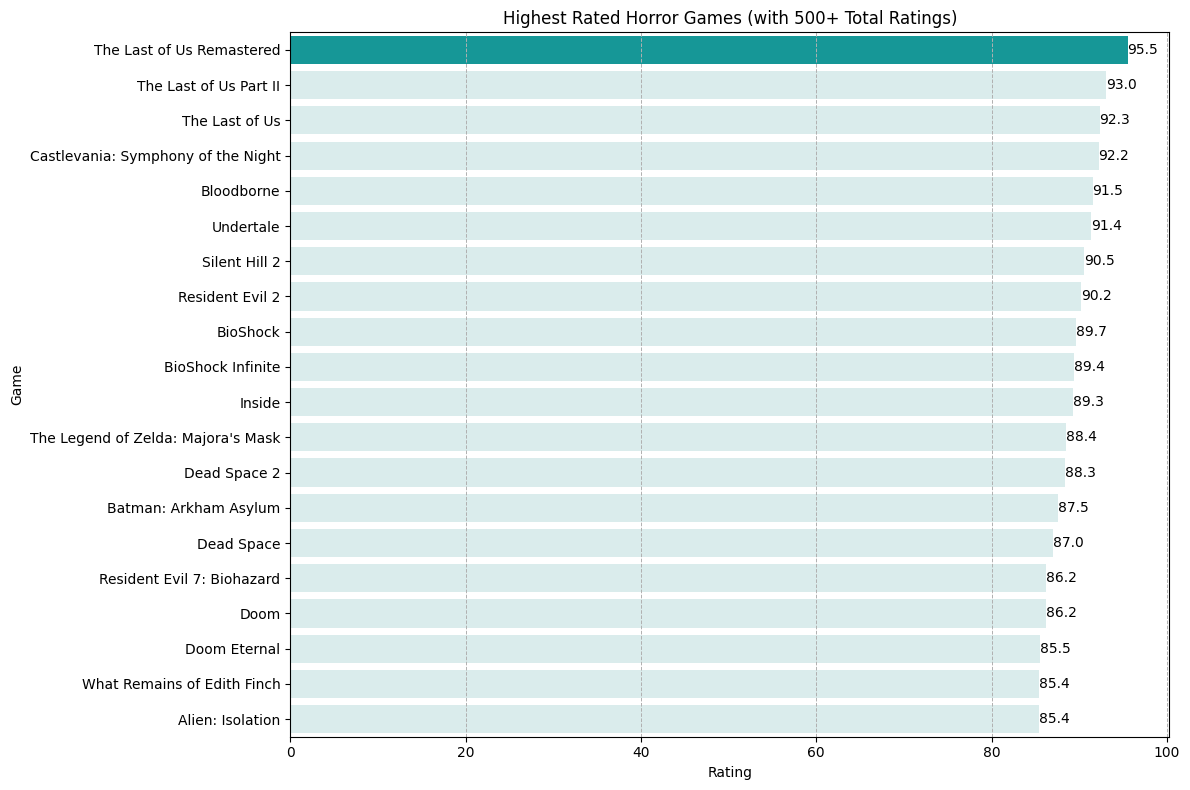

In [38]:
# Top rated game titles with the theme 'Horror'
top_horror_games = flat_themes[flat_themes['Themes'] == 'Horror']
top_horror_games = top_horror_games[top_horror_games['Total Rating Count'] >= 500]
top_horror_games = top_horror_games.sort_values(by='Total Rating Count', ascending=False)
top_horror_games =  top_horror_games.sort_values(by='Total Rating', ascending=False)
top_horror_games = top_horror_games.drop_duplicates(subset='Name').head(20)
top_horror_game = top_horror_games['Total Rating'].idxmax()

colors = ['#00adac' if i == top_horror_game else '#d7efef' for i in top_horror_games.index]
# Create a bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Rating', y='Name', data=top_horror_games, palette=colors, hue='Name', legend=False)

# Annotate each bar with the rating value
for index, value in enumerate(top_horror_games['Total Rating']):
    plt.text(value, index, f'{value:.1f}', color='black', ha='left', va='center')

plt.xlabel('Rating')
plt.ylabel('Game')
plt.title('Highest Rated Horror Games (with 500+ Total Ratings)')
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


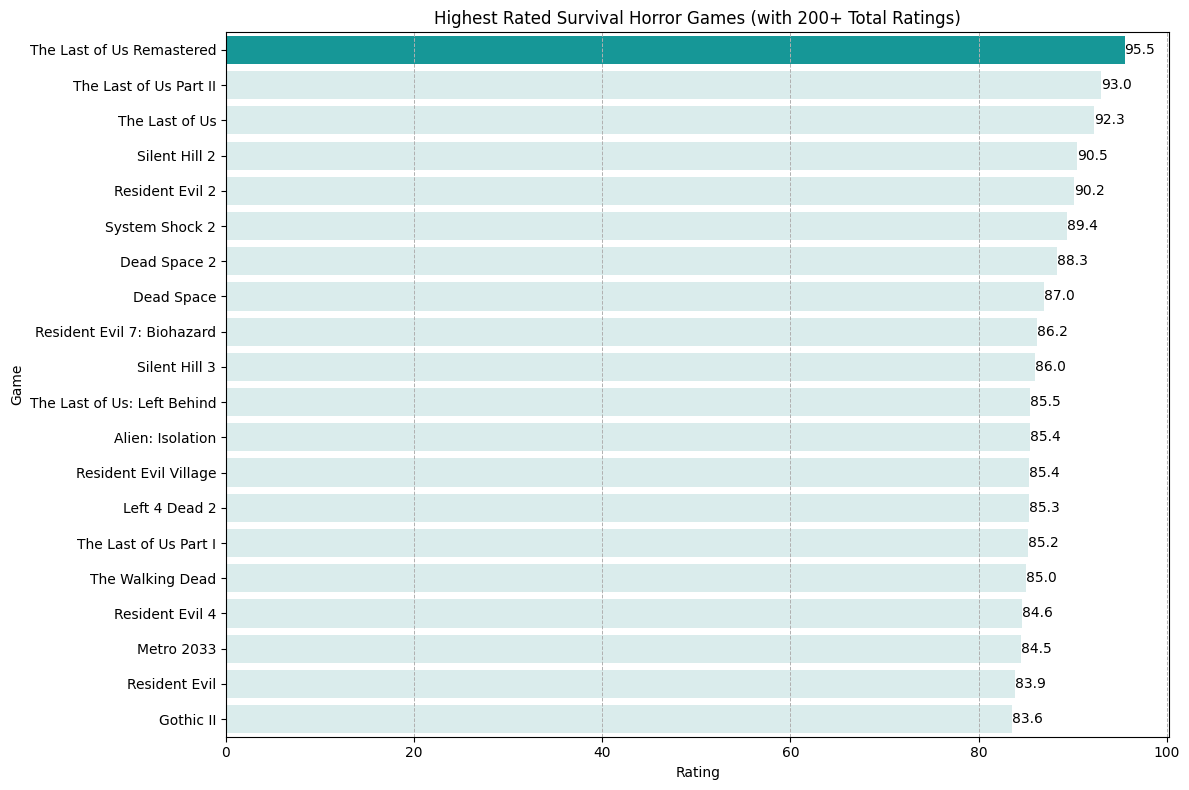

In [39]:
# Top rated game titles with the theme 'Horror'
filtered_games = games[(games['Themes'].apply(lambda x: 'Horror' in x)) & (games['Themes'].apply(lambda x: 'Survival' in x))]
survival_horror_games = filtered_games[filtered_games['Total Rating Count'] >= 200]
survival_horror_games = survival_horror_games.sort_values(by='Total Rating Count', ascending=False)
survival_horror_games =  survival_horror_games.sort_values(by='Total Rating', ascending=False)
survival_horror_games = survival_horror_games.drop_duplicates(subset='Name').head(20)

survival_horror_game = survival_horror_games['Total Rating'].idxmax()


colors = ['#00adac' if i == survival_horror_game else '#d7efef' for i in survival_horror_games.index]
# Create a bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Rating', y='Name', data=survival_horror_games, palette=colors, hue='Name', legend=False)

# Annotate each bar with the rating value
for index, value in enumerate(survival_horror_games['Total Rating']):
    plt.text(value, index, f'{value:.1f}', color='black', ha='left', va='center')

plt.xlabel('Rating')
plt.ylabel('Game')
plt.title('Highest Rated Survival Horror Games (with 200+ Total Ratings)')
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

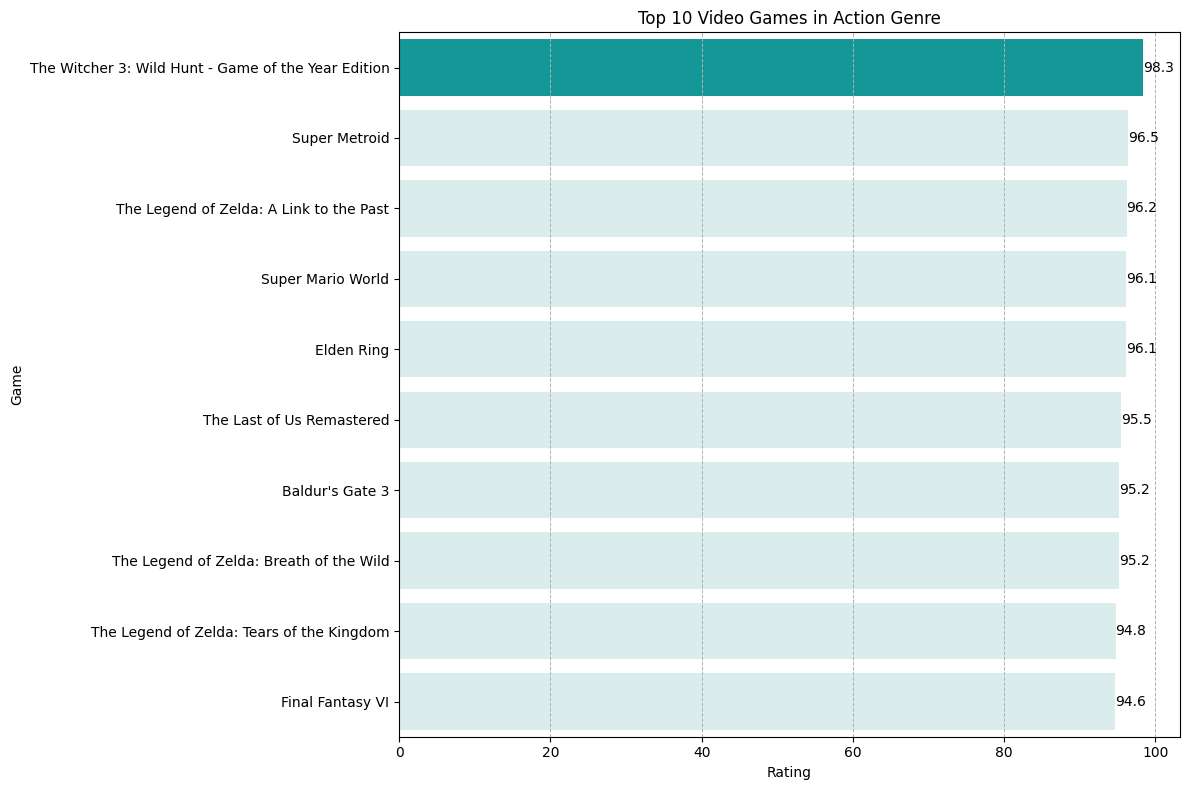

In [40]:
# Adventure, indie, rpg, strategy, adn simulator (top 5 most frequent game genres overall and for highly rated games)
action_genre_top = flat_genres[flat_genres['Genres'] == 'Adventure']
top_action_games = action_genre_top[action_genre_top['Total Rating Count'] >= 500]
top_action_games = top_action_games.sort_values(by='Total Rating Count', ascending=False)
top_action_games = top_action_games.sort_values(by='Total Rating', ascending=False)
top_action_games = top_action_games.drop_duplicates(subset='Name').head(10)

top_action_game = top_action_games['Total Rating'].idxmax()

colors = ['#00adac' if i == top_action_game else '#d7efef' for i in top_action_games.index]
# Create a bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Rating', y='Name', data=top_action_games, palette=colors, hue='Name', legend=False)

# Annotate each bar with the rating value
for index, value in enumerate(top_action_games['Total Rating']):
    plt.text(value, index, f'{value:.1f}', color='black', ha='left', va='center')

plt.xlabel('Rating')
plt.ylabel('Game')
plt.title('Top 10 Video Games in Action Genre')
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

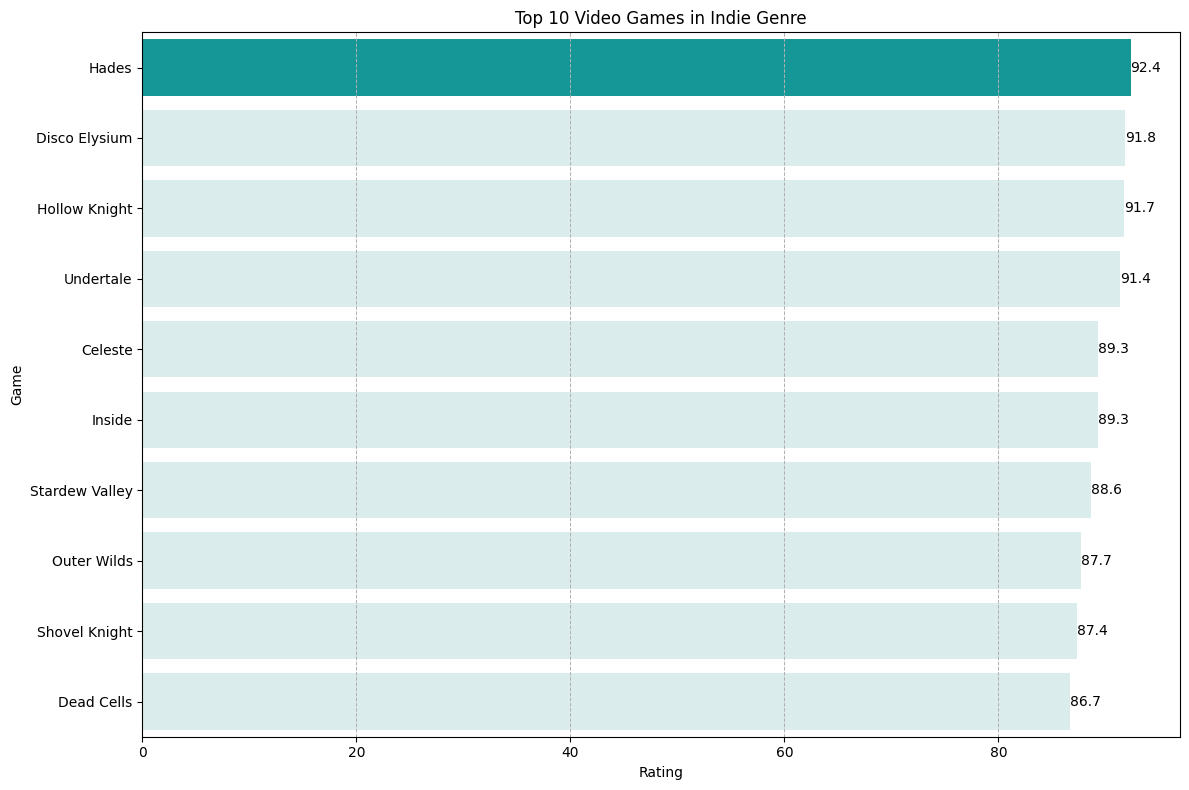

In [41]:
# Adventure, indie, rpg, strategy, adn simulator (top 5 most frequent game genres overall and for highly rated games)
indie_genre_top = flat_genres[flat_genres['Genres'] == 'Indie']
top_indie_games = indie_genre_top[indie_genre_top['Total Rating Count'] >= 500]
top_indie_games = top_indie_games.sort_values(by='Total Rating Count', ascending=False)
top_indie_games = top_indie_games.sort_values(by='Total Rating', ascending=False)
top_indie_games = top_indie_games.drop_duplicates(subset='Name').head(10)

top_indie_game = top_indie_games['Total Rating'].idxmax()

colors = ['#00adac' if i == top_indie_game else '#d7efef' for i in top_indie_games.index]
# Create a bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Rating', y='Name', data=top_indie_games, palette=colors, hue='Name', legend=False)

# Annotate each bar with the rating value
for index, value in enumerate(top_indie_games['Total Rating']):
    plt.text(value, index, f'{value:.1f}', color='black', ha='left', va='center')

plt.xlabel('Rating')
plt.ylabel('Game')
plt.title('Top 10 Video Games in Indie Genre')
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

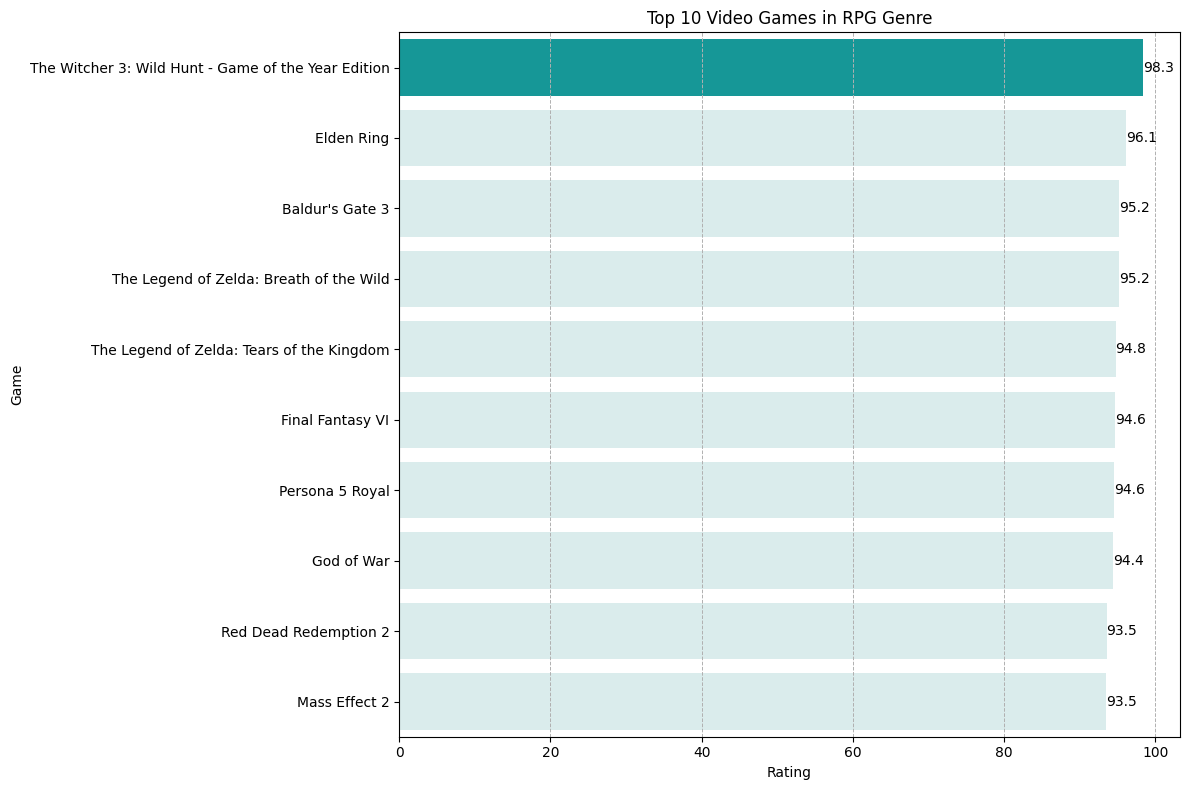

In [42]:
# Adventure, indie, rpg, strategy, adn simulator (top 5 most frequent game genres overall and for highly rated games)
rpg_genre_top = flat_genres[flat_genres['Genres'] == 'Role-playing (RPG)']
top_rpg_games = rpg_genre_top[rpg_genre_top['Total Rating Count'] >= 500]
top_rpg_games = top_rpg_games.sort_values(by='Total Rating Count', ascending=False)
top_rpg_games = top_rpg_games.sort_values(by='Total Rating', ascending=False)
top_rpg_games = top_rpg_games.drop_duplicates(subset='Name').head(10)

top_rpg_game = top_rpg_games['Total Rating'].idxmax()

colors = ['#00adac' if i == top_rpg_game else '#d7efef' for i in top_rpg_games.index]
# Create a bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Rating', y='Name', data=top_rpg_games, palette=colors, hue='Name', legend=False)

# Annotate each bar with the rating value
for index, value in enumerate(top_rpg_games['Total Rating']):
    plt.text(value, index, f'{value:.1f}', color='black', ha='left', va='center')

plt.xlabel('Rating')
plt.ylabel('Game')
plt.title('Top 10 Video Games in RPG Genre')
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

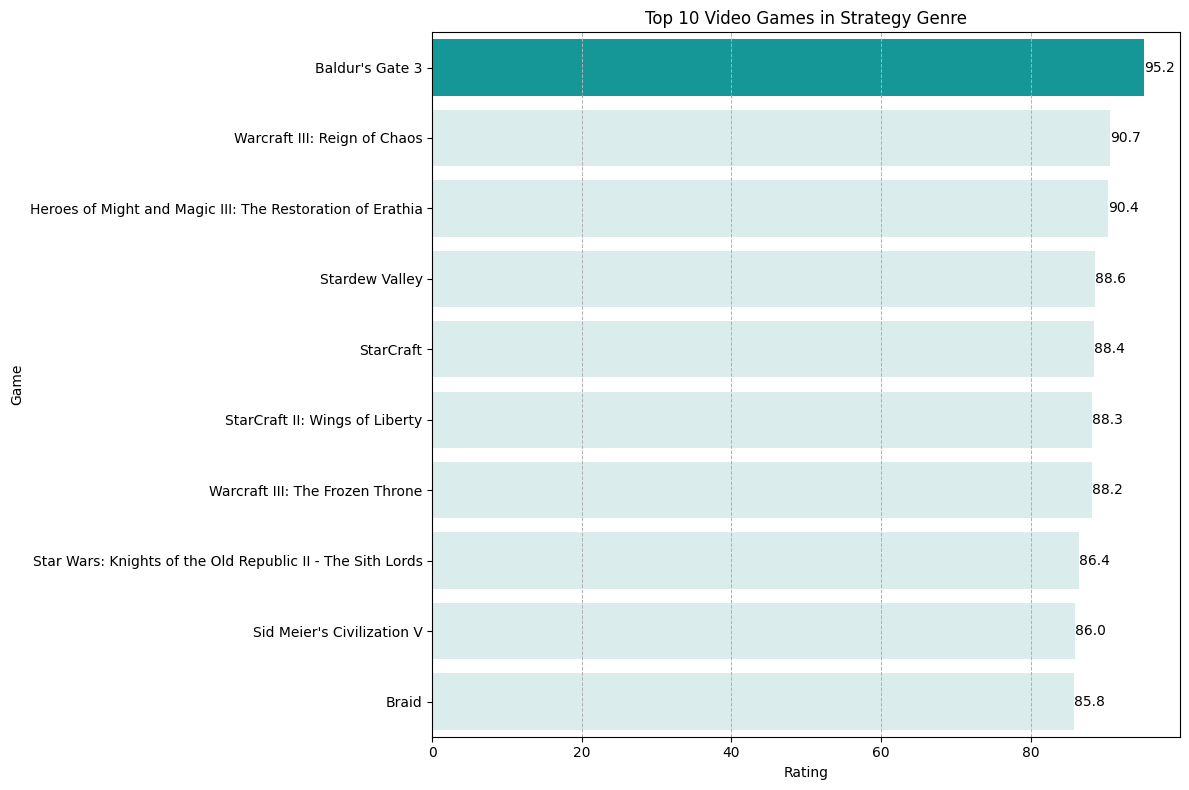

In [43]:
# Adventure, indie, rpg, strategy, adn simulator (top 5 most frequent game genres overall and for highly rated games)
strategy_genre_top = flat_genres[flat_genres['Genres'] == 'Strategy']
top_strat_games = strategy_genre_top[strategy_genre_top['Total Rating Count'] >= 500]
top_strat_games = top_strat_games.sort_values(by='Total Rating Count', ascending=False)
top_strat_games = top_strat_games.sort_values(by='Total Rating', ascending=False)
top_strat_games = top_strat_games.drop_duplicates(subset='Name').head(10)

top_strat_game = top_strat_games['Total Rating'].idxmax()

colors = ['#00adac' if i == top_strat_game else '#d7efef' for i in top_strat_games.index]
# Create a bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Rating', y='Name', data=top_strat_games, palette=colors, hue='Name', legend=False)

# Annotate each bar with the rating value
for index, value in enumerate(top_strat_games['Total Rating']):
    plt.text(value, index, f'{value:.1f}', color='black', ha='left', va='center')

plt.xlabel('Rating')
plt.ylabel('Game')
plt.title('Top 10 Video Games in Strategy Genre')
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

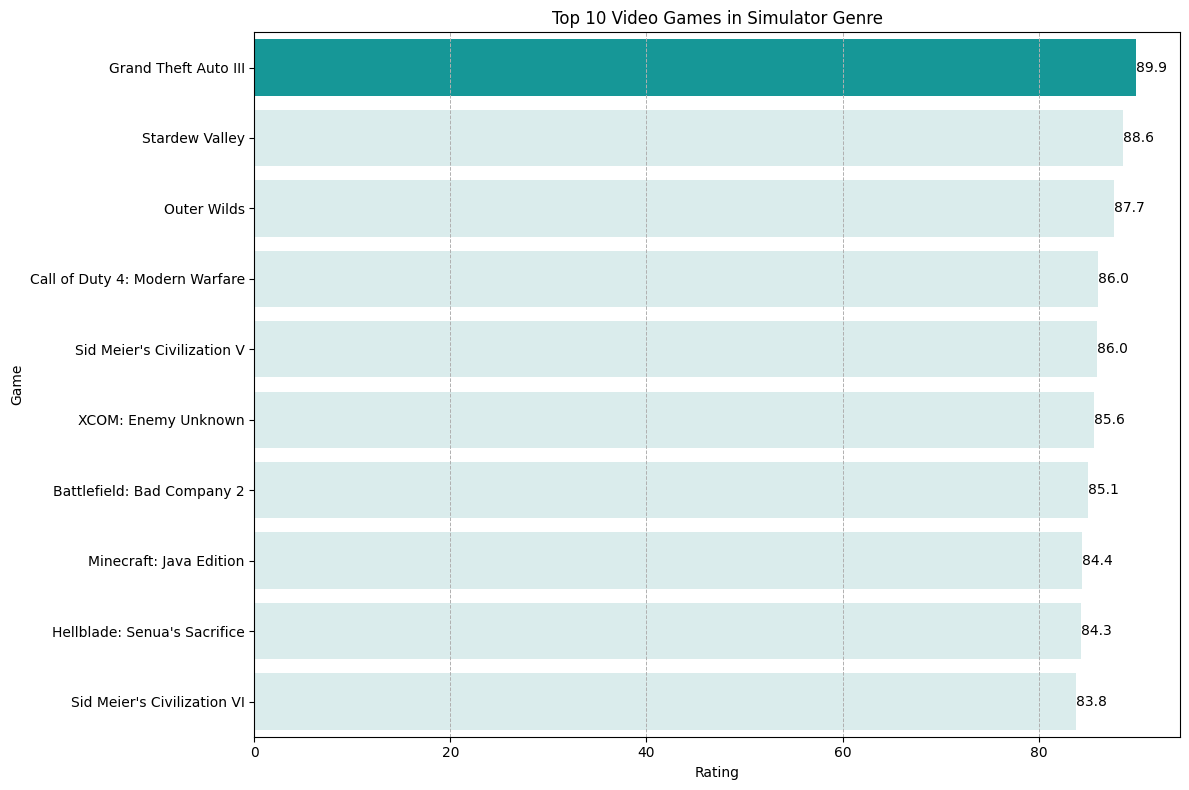

In [44]:
# Adventure, indie, rpg, strategy, adn simulator (top 5 most frequent game genres overall and for highly rated games)
simulator_genre_top = flat_genres[flat_genres['Genres'] == 'Simulator']
top_sim_games = simulator_genre_top[simulator_genre_top['Total Rating Count'] >= 500]
top_sim_games = top_sim_games.sort_values(by='Total Rating Count', ascending=False)
top_sim_games = top_sim_games.sort_values(by='Total Rating', ascending=False)
top_sim_games = top_sim_games.drop_duplicates(subset='Name').head(10)

top_sim_game = top_sim_games['Total Rating'].idxmax()

colors = ['#00adac' if i == top_sim_game else '#d7efef' for i in top_sim_games.index]
# Create a bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Rating', y='Name', data=top_sim_games, palette=colors, hue='Name', legend=False)

# Annotate each bar with the rating value
for index, value in enumerate(top_sim_games['Total Rating']):
    plt.text(value, index, f'{value:.1f}', color='black', ha='left', va='center')

plt.xlabel('Rating')
plt.ylabel('Game')
plt.title('Top 10 Video Games in Simulator Genre')
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

In [45]:
keyword_search = flat_keywords[flat_keywords['Keywords'] == 'scary']
keyword_search

,Name,First Release Date,Genres,Themes,Keywords,Total Rating Count,Total Rating,Year Released
1222,The Man in the Fields,2024-08-05,[Indie],"[Horror, Survival, Mystery]",scary,0,0.0,2024
1537,The Secret Door,NaT,"[Adventure, Indie]","[Action, Horror]",scary,0,0.0,0
1558,Color Fear,NaT,"[Adventure, Indie]","[Action, Horror, Thriller, Mystery]",scary,0,0.0,0
1561,Silent Sonata,2024-07-22,"[Puzzle, Strategy, Adventure]","[Action, Horror, Thriller, Mystery]",scary,0,0.0,2024
1635,Backrooms Media,2024-09-10,"[Adventure, Indie]",[Horror],scary,0,0.0,2024
...,...,...,...,...,...,...,...,...
248876,Demonologist,2023-09-25,"[Puzzle, Simulator, Adventure, Indie]","[Action, Horror, Mystery]",scary,7,51.6,2023
250582,Killer Klowns From Outer Space: The Game - Dig...,2024-06-04,[Adventure],"[Action, Horror, Survival]",scary,0,0.0,2024
251870,The Last Shift,NaT,[Simulator],"[Horror, Thriller]",scary,0,0.0,0
252201,The Complex Tragedy,2024-02-12,[Indie],[Horror],scary,0,0.0,2024


## Visualizations (New)

In [58]:
# Set up the connection to Survivor sql database
conn = sqlite3.connect('igdb.db')

# Converts the game dataframes to SQL tables inside the igdb database
flat.to_sql('games', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

def sql(query:str) -> pd.DataFrame: 
    '''
    Performs the SQL query on the Survivor database and returns the result as a DataFrame.

    Args:
    query (str): The SQL query to be executed.

Returns:
    pd.DataFrame: DataFrame containing the result of the query.
    '''
    # Set up the connection to igdb.db
    conn = sqlite3.connect('igdb.db')

    # create a dataframe equal to the result of the query
    df = pd.read_sql_query(query, conn)
    
    # close the connection
    conn.close()
    return df